# **Micro-spatial distribution and crystal size distribution of ZS-21-02**

This jupyter notebook provides the code to reproduce figure 3.


In [2]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path
from scipy.stats import probplot

In [3]:
# Import local functions from garNET.py module
from garNET import DataSet
from garNET import Plotting

## **Read data**

From the labelled dataset of ZS-21-02 read in the shape classes.

From the raw dat of ZS-21-02 read in the centroids coordinates and convex hull voxel counts.

In [4]:
shape_classes = DataSet.read_classes_from_labelled_set(dataset=Path("Data", "ZS2102_labelled"))

metadata = DataSet.load_metadata(Path("Data", "ZS2102_raw"))
scan_dim = metadata["scan_dim"]
centroids = metadata["centroids"][1:,:] # Remove first entry, corrsponding to background
convex_vol = metadata["convex_vol"]

In [21]:
# filter out grains with the shapes: "edge", "multiple" and "notGarnet"
filter_shapes = np.logical_and(np.logical_and(shape_classes != "edge", shape_classes != "multiple"), shape_classes != "notGarnet")

shape_classes_filtered = shape_classes[filter_shapes]
convex_vol_filtered = convex_vol[filter_shapes]
centroids_filtered = centroids[filter_shapes]

In [22]:
shape_classes_filtered

array(['intact', 'intact', 'intact', ..., 'intact', 'intact', 'pitting'],
      dtype='<U32')

## **Statistics**

In [27]:
no_grains = np.shape(shape_classes)[0]
no_garnets_filtered = np.shape(shape_classes_filtered)[0]

no_atolls = np.sum(shape_classes_filtered == "atoll")
no_pitting = np.sum(shape_classes_filtered == "pitting")
no_intact = np.sum(shape_classes_filtered == "intact")

print("Total number of segmented grains: ", no_grains)
print("Total number of garnets: {a} ({b:.2f}% of segmented grains)".format(a=no_garnets_filtered, b=100*no_garnets_filtered/no_grains))

print("Number of atoll garnets: {a} ({b:.2f}% of garnets)".format(a=no_atolls, b=100*no_atolls/no_garnets_filtered))
print("Number of pitted garnets: {a} ({b:.2f}% of garnets)".format(a=no_pitting, b=100*no_pitting/no_garnets_filtered))
print("Number of intact garnets: {a} ({b:.2f}% of garnets)".format(a=no_intact, b=100*no_intact/no_garnets_filtered))
print("Number of other garnets: {a} ({b:.2f}% of garnets)".format(a=no_garnets_filtered - no_atolls - no_pitting - no_intact, b=100*(no_garnets_filtered - no_atolls - no_pitting - no_intact)/no_garnets_filtered))

Total number of segmented grains:  1841
Total number of garnets: 1350 (73.33% of segmented grains)
Number of atoll garnets: 288 (21.33% of garnets)
Number of pitted garnets: 244 (18.07% of garnets)
Number of intact garnets: 751 (55.63% of garnets)
Number of other garnets: 67 (4.96% of garnets)


## **Plotting**

- Micro-spatial distribution (MSD)
- Crystal size distribution (CSD)

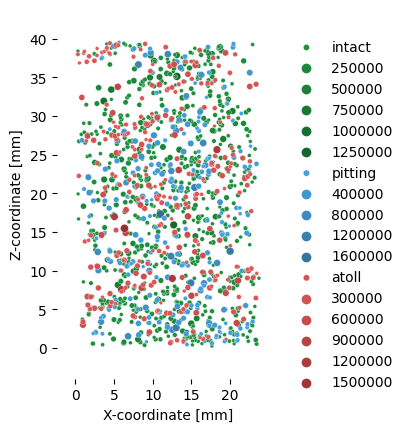

In [24]:
fig, ax = plt.subplots()

Plotting.projection(centroids=centroids_filtered, scan_dim=scan_dim, vx_cts=convex_vol_filtered,
                    shape_classes=shape_classes_filtered, res_in_mm=0.018, shapes_of_interest=["intact", "pitting", "atoll"],
                    x="X", y="Z", color_shape_classes=[["#1D913E", "#105223"], ["#43A2DE", "#336D91"], ["#DE5959", "#912C2C"]], ax=ax)

plt.show()

0.03982988342833032
0.03982988342833032


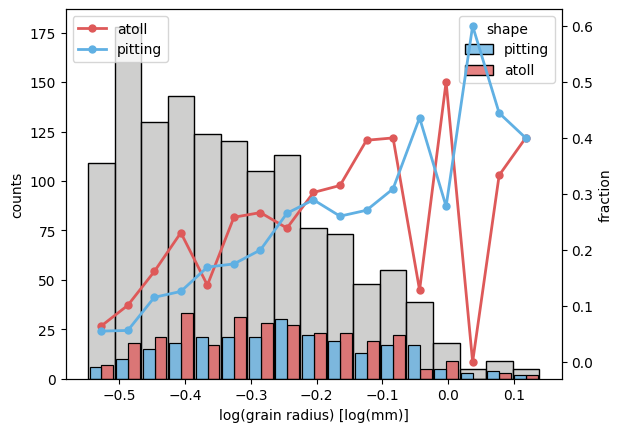

In [25]:
fig, ax = plt.subplots()

Plotting.crystal_size_distribtuion(vx_cts=convex_vol_filtered, shape_classes=shape_classes_filtered,
                          res_in_mm=0.018, shapes_of_interest=["atoll", "pitting"], log=True,
                          ax=ax, color_all="#C0BFBE", color_shape_classes=["#60B0E3", "#DE5959"])

tax = ax.twinx()

Plotting.class_fraction_in_CSD(vx_cts=convex_vol_filtered, shape_classes=shape_classes_filtered,
                      res_in_mm=0.018, shapes_of_interest=["atoll", "pitting"], log=True,
                      ax=tax, color_shape_classes=["#DE5959", "#60B0E3"])

plt.show()

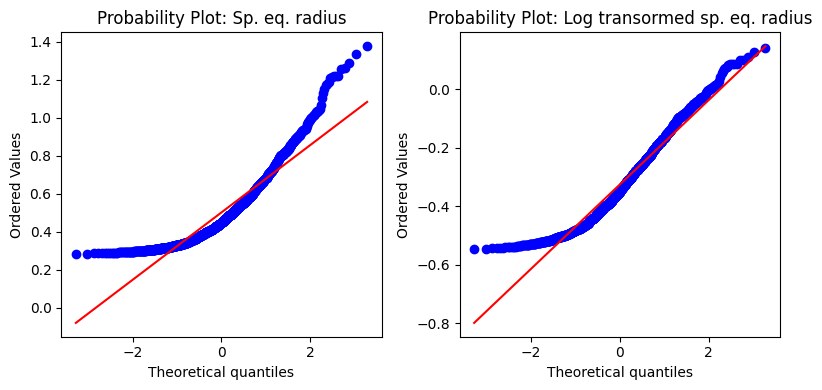

In [26]:
res_mm = 0.018

sp_eq_radius_vx = (((3/4)*convex_vol_filtered)/np.pi)**(1/3)

sp_eq_radius_mm = sp_eq_radius_vx*res_mm
log_sp_eq_radius_mm = np.log10(sp_eq_radius_mm)

fig, axs = plt.subplots(1, 2, figsize=(8, 4))

probplot(sp_eq_radius_mm, dist="norm", plot=axs[0])
probplot(log_sp_eq_radius_mm, dist="norm", plot=axs[1])

axs[0].set_title("Probability Plot: Sp. eq. radius")
axs[1].set_title("Probability Plot: Log transormed sp. eq. radius")

fig.tight_layout()
plt.show()